# Introduction to Clustering

**Unsupervised Learning Algorithms** takes a dataset containing many features, then learn useful properties(patterns) of the structure of that dataset. **Clustering** is one type of unsupervised learning which divides the dataset into clusters(groups) of similar examples.

* The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. This also means no defined dependant and independant variables
* Patterns in the data are used to identify / group similar observations
* Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

Few examples of clusters here:
![Cluster Example1](clusterex1.jpg)
![Cluster Example2](clusterex2.jpg)

**Why Clustering**
In many cases users simply want to identify the patterns in the data (exploratory analysis) and use that patterns to group samples together then label the groups. So certianly you can see unsupervised learning as a prior step for Supervised Learning. There are no criteria for a good clustering. It depends on the user and what the user want to achieve. For instance, the user could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection). Clustering algorithm must make some assumptions which constitute the similarity of points and each assumption make different and equally valid clusters.

**Clustering Methods**
* Density - Considers the clusters as the dense region having some similarity and different from the lower dense region of the space. 
* Hierarichal - Forms a tree-type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two category
    1. Agglomerative (bottom up approach)
    2. Divisive (top down approach)
* Partitioning - Partition the objects into k clusters and each partition forms one cluster. This method is used to optimize an objective criterion similarity function such as when the distance is a major parameter example K-means, CLARANS (Clustering Large Applications based upon Randomized Search) etc. 
* Grid - Data space is formulated into a finite number of cells that form a grid-like structure. All the clustering operation done on these grids are fast and independent of the number of data objects example STING (Statistical Information Grid), wave cluster, CLIQUE (CLustering In Quest) etc.

**K-Means Clustering**
It is the simplest unsupervised learning algorithm that solves clustering problem. K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster. 

The algorithm works as follows:

* First initialize k points, called means, randomly.
* Categorize each item to its closest mean and update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
* Repeat the process for a given number of iterations and at the end all clusters are formed

*Note: The “points” mentioned above are called means, because they hold the mean values of the items categorized in it*

![K-Means Animation](KmeanAnim.gif)

# Learn by Example - California Housing Dataset

## Source
https://www.kaggle.com/camnugent/california-housing-prices

## Context

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

## Content

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

In [3]:
# Import required modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# Read Dataset
df = pd.read_csv("housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
# Let's understand dataset
print(df.size)
df['ocean_proximity'].value_counts()

206400


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
# Let's take only 3 features as an example to do K-Means Clustering
X = df.drop('ocean_proximity', axis=1)
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

In [8]:
# Create cluster feature
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value Cluster  
0       322.0       126.0         8.3252            452600.0       2  
1      2401.0      1138.0         8.3014            358500.0       4  
2       496.0       177.0         7.2574            352100.0       4  
3       558.0       219.0         5.6431            341300.0       4  
4       565.0       259.0         3.8462            342200.0       4

In [9]:
X['Cluster'].value_counts()

3    6373
0    5682
1    4484
4    2295
2    1599
Name: Cluster, dtype: int64

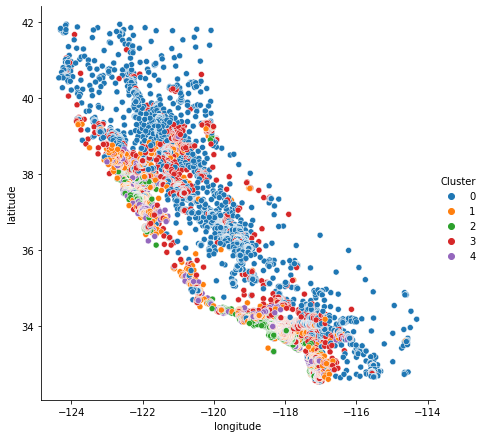

In [10]:
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=X, height=6)

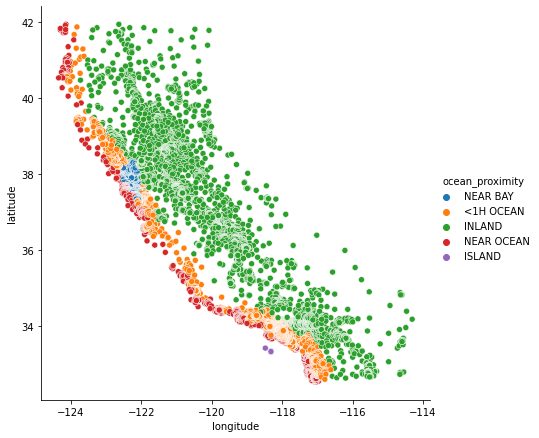

In [11]:
sns.relplot(x="longitude", y="latitude", hue="ocean_proximity", data=df, height=6)

Let's try a simpler Iris dataset now

In [12]:
df = pd.read_csv('irisdata.csv')
df.head()

F1   F2   F3   F4        Label
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [13]:
df['Label'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Label, dtype: int64

In [14]:
X = df.drop('Label', axis=1)
kmean=KMeans(n_clusters=3)
kmean.fit(X)

KMeans(n_clusters=3)

In [15]:
kmean.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [16]:
# Check the created Labels
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Cluster 1 Inertia 680.8243999999996
Cluster 2 Inertia 152.36870647733915
Cluster 3 Inertia 78.94084142614601
Cluster 4 Inertia 57.34540931571815
Cluster 5 Inertia 46.535582051282034
Cluster 6 Inertia 38.93873974358975
Cluster 7 Inertia 34.190687924796634
Cluster 8 Inertia 29.90537429982511
Cluster 9 Inertia 27.927882157034986
Cluster 10 Inertia 25.955497086247092
Cluster 11 Inertia 24.416268037518037
Cluster 12 Inertia 22.71167478354979
Cluster 13 Inertia 21.356951298701308
Cluster 14 Inertia 19.90584794372295
Cluster 15 Inertia 18.68692748917749
Cluster 16 Inertia 17.89992748917749
Cluster 17 Inertia 17.11061507936509
Cluster 18 Inertia 16.04673412698413
Cluster 19 Inertia 15.462845238095243


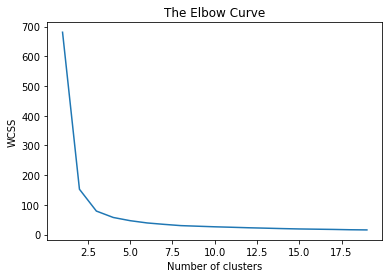

In [17]:
# Elbow Curve
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

*Note: You can see there is K-means++ as the method than conventional k-means. The former method overcomes the disadvantage of wrong selection of centroids which usually happens because of manual selection. Sometimes the centroids chosen are too far away from the points that they don’t have any data points in their cluster.*

In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), wcss, curve="convex", direction="decreasing")
kl.elbow

3

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [25]:
from sklearn.metrics import silhouette_score

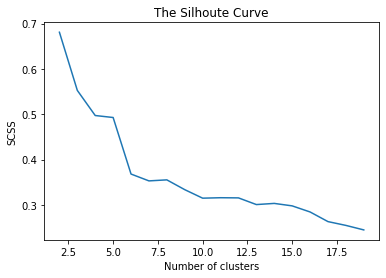

In [31]:
# Silhouette Score
scss = []
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
for i in range(2,20):
 kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
 kmeans.fit(X)
 scss.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2,20),scss)
plt.title('The Silhoute Curve')
plt.xlabel('Number of clusters')
plt.ylabel('SCSS')
plt.show()

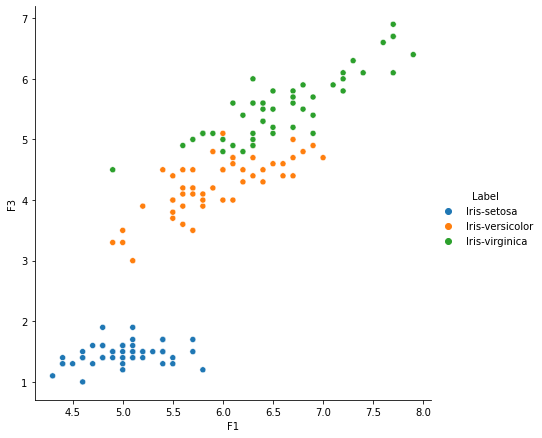

In [33]:
sns.relplot(x="F1", y="F3", hue="Label", data=df, height=6)

# References
1. [https://realpython.com/k-means-clustering-python/#writing-your-first-k-means-clustering-code-in-python](https://realpython.com/k-means-clustering-python/#writing-your-first-k-means-clustering-code-in-python)
2. [https://www.kaggle.com/ryanholbrook/clustering-with-k-means](https://www.kaggle.com/ryanholbrook/clustering-with-k-means)
3. [https://www.geeksforgeeks.org/clustering-in-machine-learning/](https://www.geeksforgeeks.org/clustering-in-machine-learning/)